In [1]:
import pandas as pd
import numpy as np

In [2]:
#!unzip "drive/MyDrive/Dog_Breed_Identification_project/dog-breed-identification.zip" -d "drive/MyDrive/Dog_Breed_Identification_project/"

  # Dog Breed Identification Project
  TensorFlow is used

## 1. Problem Statement:
      Identify Dog breed of the given dog's picture.

## 2. Data:
      From Kaggle
      Unstructured Data(Images)

## 3. Evaluation:
      A file with prediction probabilities for each dog breed of each test image.

## 4. Features:
      * There are 120 breeds of dog.
      * 10000+ images in training set. (with labels)
      * 10000+ images in test set. (no labels)
      
      


# Getting workspace Ready

  * Import TensorFlow 2.x
  * Import TensorFlow Hub
  * Use GPU

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
print("TensorFlow version: ",tf.__version__)
print("TensorFlow Hub version:",hub.__version__)

# Check GPU availability
print("GPU", "available!!!" if tf.config.list_physical_devices("GPU") else "not available!!!")

TensorFlow version:  2.17.1
TensorFlow Hub version: 0.16.1
GPU not available!!!


# Getting Data Ready (Turning It into Tensors)
   Turning Data (Images) into Tensors i.e. Numerical Representation.

In [4]:
import pandas as pd
labels_csv=pd.read_csv("drive/MyDrive/Dog_Breed_Identification_project/labels.csv")
print(labels_csv.describe())
labels_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
labels_csv["breed"].value_counts()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
brabancon_griffon,67
komondor,67


<Axes: xlabel='breed'>

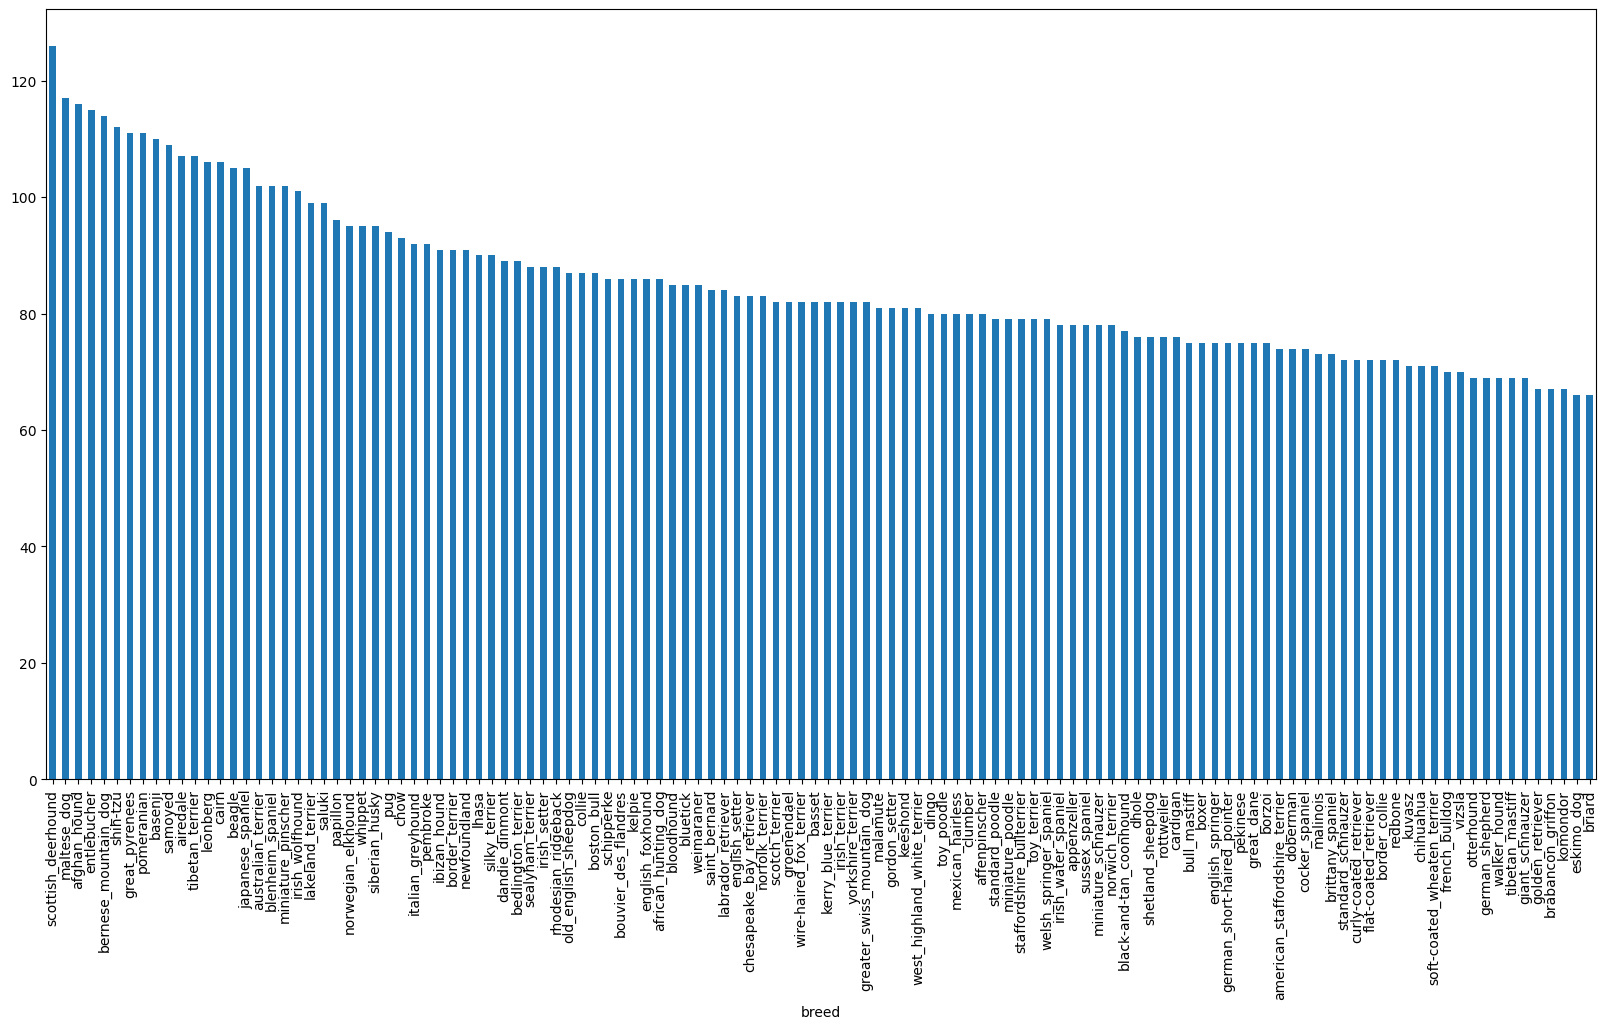

In [6]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [7]:
labels_csv["breed"].value_counts().median()

82.0

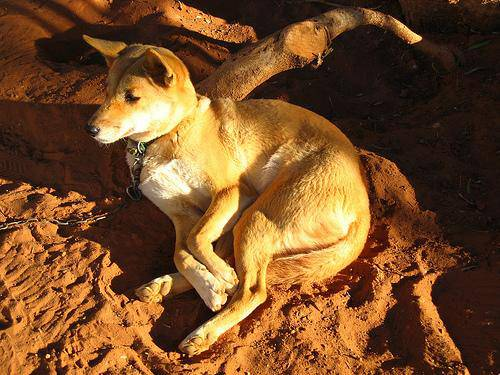

In [8]:
from IPython.display import Image
Image("drive/MyDrive/Dog_Breed_Identification_project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

# Getting Images and Labels
  Get list of Image File pathnames.

In [9]:
filenames=["drive/MyDrive/Dog_Breed_Identification_project/train/"+ filename +".jpg" for filename in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Dog_Breed_Identification_project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Breed_Identification_project/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
#Checking if number of filenames match number of images
import os
if len(os.listdir("drive/MyDrive/Dog_Breed_Identification_project/train/"))==len(filenames):
  print("Filenames match.Proceed!")
else:
  print("Filenames number not match.")

Filenames match.Proceed!


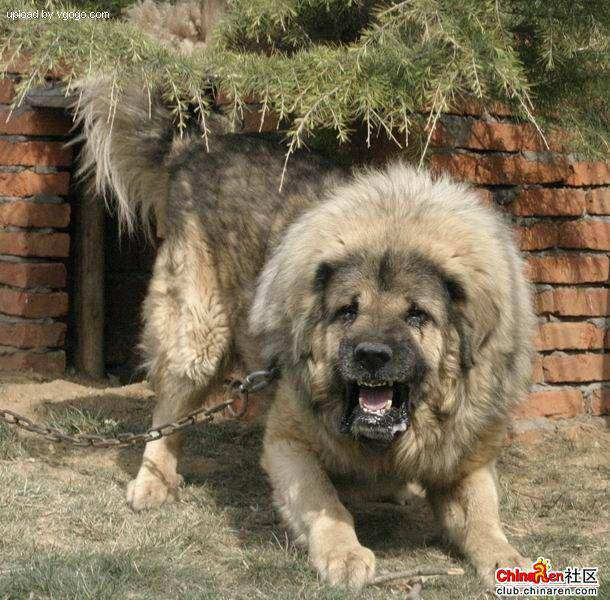

In [11]:
Image(filenames[9000])

In [12]:
labels_csv["breed"][9000]

'tibetan_mastiff'

###  Converting Labels into numbers

In [13]:
import numpy as np
labels=labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
len(labels)

10222

### Checking Missing Data

In [15]:
if len(labels)==len(filenames):
  print("No missing Data!")
else:
  print("Some Data is Missing!")

No missing Data!


#### Finding unique labels ie. breeds.

In [16]:
unique_breeds=np.unique(labels)
len(unique_breeds)

120

#### Turning every label into boolean array

In [17]:
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [18]:
len(boolean_labels)

10222

In [19]:
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# Splitting Data into Training and Validation Data set

In [20]:
x=filenames
y=boolean_labels

In [21]:
NUM_IMAGES=1000 #@param{type:"slider",min:1000,max:10000,step:1000}

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],
                                             y[:NUM_IMAGES],
                                             test_size=0.2,
                                             random_state=1)
len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [23]:
x_train[:5],y_train[:2]

(['drive/MyDrive/Dog_Breed_Identification_project/train/0943d1d4677ab876b52468096baaa2ce.jpg',
  'drive/MyDrive/Dog_Breed_Identification_project/train/187b3a867bb68860208c37aaf43d2115.jpg',
  'drive/MyDrive/Dog_Breed_Identification_project/train/182c9134e07c883dfdc2acfb21184810.jpg',
  'drive/MyDrive/Dog_Breed_Identification_project/train/013c43f40f0fb13fa25ac0c2a70fd48f.jpg',
  'drive/MyDrive/Dog_Breed_Identification_project/train/0ca9280205bd68d201e1d708db3f209d.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False,  True, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, Fals

# Preprocessing (Turning Images into Tensors)

Function should:
  1. Take image filepath as input.
  2. Use TensorFlow to read the file and save it to a variable, `image`.
  3. Turn `image` (.jpg) into tensors.
  4. Normalize `image` Convert colour channel values fro 0-255 to 0 to 1.
  5. Resize `image` to be in shape of (250,250).
  6. Return the modified `image`.

In [24]:
from matplotlib.pyplot import imread
image=imread(filenames[9000])
image.shape

(600, 610, 3)

In [25]:
image[:2]

array([[[124, 129,  88],
        [150, 155, 114],
        [122, 127,  86],
        ...,
        [ 80,  85,  55],
        [ 66,  73,  40],
        [ 66,  73,  40]],

       [[144, 149, 108],
        [153, 158, 117],
        [121, 126,  85],
        ...,
        [ 58,  63,  33],
        [ 65,  72,  41],
        [ 65,  72,  39]]], dtype=uint8)

In [26]:
image.max(), image.min()

(255, 0)

In [27]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 610, 3), dtype=uint8, numpy=
array([[[124, 129,  88],
        [150, 155, 114],
        [122, 127,  86],
        ...,
        [ 80,  85,  55],
        [ 66,  73,  40],
        [ 66,  73,  40]],

       [[144, 149, 108],
        [153, 158, 117],
        [121, 126,  85],
        ...,
        [ 58,  63,  33],
        [ 65,  72,  41],
        [ 65,  72,  39]]], dtype=uint8)>

## Function Creation

In [28]:
IMG_SIZE=250

def process_image(image_path,img_size=IMG_SIZE):
  """
  Takes file patrh as input and gives tensor as output
  """
  image=tf.io.read_file(image_path)
  #Converting image to numerical tensor with 3 colour channels ie. Red, Green, Blue
  image=tf.image.decode_jpeg(image,channels=3)
  #Converting colour channel values from 0-255 to 0 to 1.
  image=tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

## Turning Data into Batches
   As trying to process all the 10000+ images at once will be difficult (will be slow) as they won't fit in GPU's memory.
   Let's make batch size 20 ie. 20 images at a time.

   In order to use TensorFlow effectively, data should be in the form of tensor couples like:
   `(image,label)`


### Function for returning tuple (image, label)

In [58]:
def get_image_label(image_path,label):
  """
  Takes file path and label, processes image and returns tuple of (image, label)
  """
  image=process_image(image_path)
  return image,label

In [59]:
(process_image(x[32]),tf.constant(y[32]))

(<tf.Tensor: shape=(250, 250, 3), dtype=float32, numpy=
 array([[[0.02107843, 0.09852941, 0.03921569],
         [0.2857843 , 0.3642157 , 0.30637255],
         [0.09460784, 0.15980393, 0.10539217],
         ...,
         [0.0127451 , 0.04950981, 0.02696079],
         [0.00294118, 0.04656863, 0.01127451],
         [0.01470588, 0.06176471, 0.02254902]],
 
        [[0.11225491, 0.18676472, 0.13921571],
         [0.02254902, 0.07745099, 0.02843137],
         [0.06372549, 0.12745099, 0.08186275],
         ...,
         [0.00980392, 0.03480393, 0.01813726],
         [0.01176471, 0.05245098, 0.02009804],
         [0.02058824, 0.06176471, 0.02843137]],
 
        [[0.07352942, 0.14803924, 0.1009804 ],
         [0.04264706, 0.09509804, 0.05637255],
         [0.01666667, 0.06176471, 0.02696078],
         ...,
         [0.0132353 , 0.0382353 , 0.0122549 ],
         [0.0132353 , 0.04362746, 0.01666667],
         [0.01421569, 0.04460785, 0.01862745]],
 
        ...,
 
        [[0.32990196, 0.49460787

In [60]:
BATCH_SIZE=20

def create_data_batches(x,y=None, batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Convert Data (x abd y pairs) into batches.
  Shuffles data if it's training data but doesn't shuffle validation data.
  Also accepts test data as input (no labels).
  """

  # If Test Data (No Labels)
  if test_data:
    print("Creating Test Data Batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))   #Only filepaths No Labels
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If Valid Data (No shuffling required)
  elif valid_data:
    print("Creating Valid Data Batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))      #Filepaths,Labels
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating Training Data Batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    # Shuffling before Mapping is faster
    data=data.shuffle(buffer_size=len(x))
    data=data.map(get_image_label)
    data_batch=data.batch(BATCH_SIZE)
  return data_batch

In [61]:
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)

Creating Training Data Batches...
Creating Valid Data Batches...


In [62]:
#Checking Different attributes of Data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

###Visualizing Data Batches

In [84]:
import matplotlib.pyplot as plt

def show_20_images(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(20):
    # 4 rows 4 columns i+1 index
    ax=plt.subplot(5,4,i+1)
    plt.imshow(images[i])
    #gives label name where label has highest value(ie. True or 1) in labels list in unique breeds.
    plt.title(unique_breeds[labels[i].argmax()])
    # To turn gridlines off
    plt.axis("off")


In [80]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Turn `train_data` `val_data` into an iterator type. (Right now it is Batch Dataset type.)

In [87]:
#Everytime this cell is run images will be new as data is shuffled
train_images,train_labels=next(train_data.as_numpy_iterator())
train_images,train_labels

(array([[[[6.85784340e-01, 5.83823562e-01, 4.85784352e-01],
          [5.66176474e-01, 4.60784346e-01, 3.77451003e-01],
          [6.08333349e-01, 5.02451003e-01, 4.27941203e-01],
          ...,
          [3.39215696e-01, 3.33333343e-01, 2.68627465e-01],
          [4.29411769e-01, 4.04901981e-01, 3.62254918e-01],
          [3.73039246e-01, 3.45588267e-01, 3.06372553e-01]],
 
         [[5.85784316e-01, 4.89705920e-01, 3.85784328e-01],
          [5.60294151e-01, 4.56372589e-01, 3.70098054e-01],
          [5.20098090e-01, 4.14215714e-01, 3.39705914e-01],
          ...,
          [3.34803939e-01, 3.27450991e-01, 2.67156869e-01],
          [4.00000006e-01, 3.82843137e-01, 3.43137264e-01],
          [5.36274552e-01, 5.17647088e-01, 4.81372535e-01]],
 
         [[5.57353020e-01, 4.66176480e-01, 3.55392158e-01],
          [5.55882394e-01, 4.55882370e-01, 3.60784322e-01],
          [4.63235319e-01, 3.57352972e-01, 2.77941197e-01],
          ...,
          [2.96078444e-01, 2.88235307e-01, 2.3823

In [82]:
len(train_images),len(train_labels)

(20, 20)

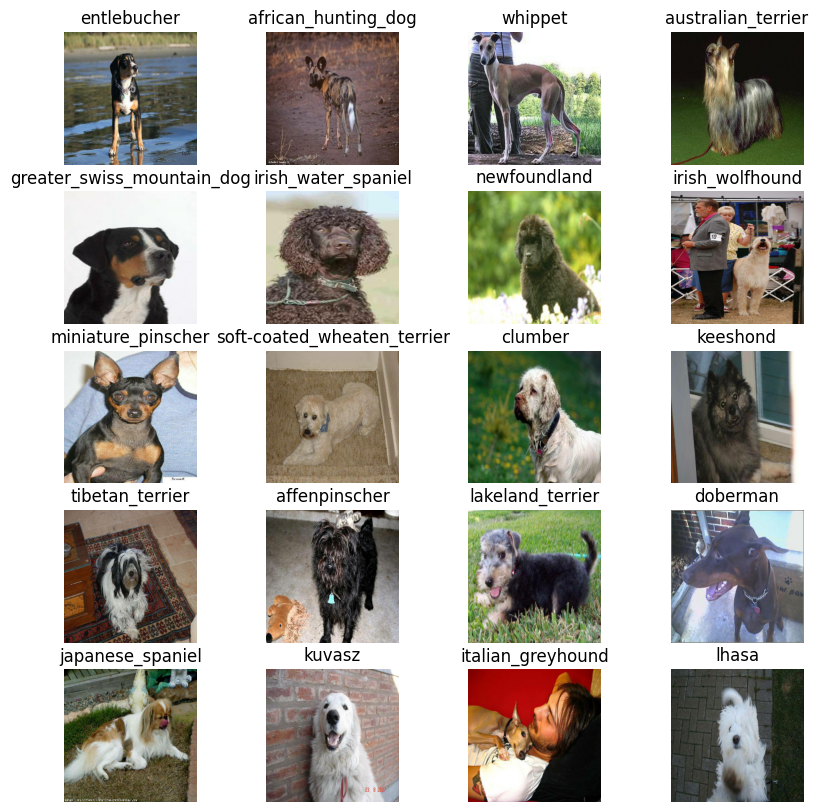

In [86]:
show_20_images(train_images,train_labels)

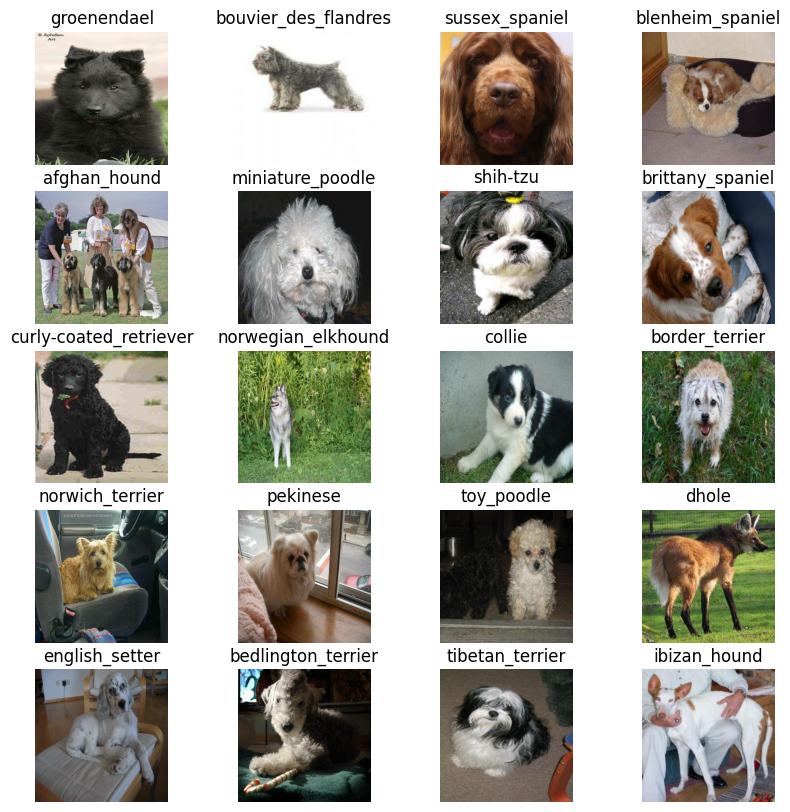

In [88]:
val_images, val_labels=next(val_data.as_numpy_iterator())
show_20_images(val_images,val_labels)